## Import dataset

In [1]:
import pandas as pd

data = pd.read_csv('data/prepared_data.csv')

## Extract the meta data and labels

In [2]:
data_meta = data[['useful', 'funny', 'cool']]
X = data_meta.values
y = data['rating']

## Encode and categorize labels

In [3]:
from sklearn import preprocessing
from keras.utils import to_categorical

encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(y)

y = to_categorical(y)

Using TensorFlow backend.


## Split data into Training and Test sets

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Create the model

In [5]:
from keras.layers import Input
from keras.layers.core import Dense
from keras.models import Model

meta_inputs = Input(shape=(3,))

dense_layer_1 = Dense(10, activation='relu')(meta_inputs)

dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)

dense_layer_output = Dense(3, activation='softmax')(dense_layer_2)

model = Model(inputs=meta_inputs, outputs=dense_layer_output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________
None


## Train the model

In [6]:
trained_model = model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=1, validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 86us/step - loss: 0.8726 - acc: 0.6700 - val_loss: 0.7844 - val_acc: 0.6913
Epoch 2/10
6400/6400 [==============================] - 0s 65us/step - loss: 0.7820 - acc: 0.6794 - val_loss: 0.7619 - val_acc: 0.6956
Epoch 3/10
6400/6400 [==============================] - 0s 62us/step - loss: 0.7769 - acc: 0.6839 - val_loss: 0.7588 - val_acc: 0.6969
Epoch 4/10
6400/6400 [==============================] - 0s 62us/step - loss: 0.7758 - acc: 0.6833 - val_loss: 0.7588 - val_acc: 0.6938
Epoch 5/10
6400/6400 [==============================] - 0s 63us/step - loss: 0.7745 - acc: 0.6837 - val_loss: 0.7573 - val_acc: 0.6944
Epoch 6/10
6400/6400 [==============================] - 0s 68us/step - loss: 0.7743 - acc: 0.6848 - val_loss: 0.7562 - val_acc: 0.6950
Epoch 7/10
6400/6400 [==============================] - 0s 68us/step - loss: 0.7730 - acc: 0.6839 - val_loss: 0.7550 - val_acc: 0.6944
Epoch 8

## Evaluate the model

In [7]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

2000/2000 [==============================] - 0s 21us/step
Test Score: 0.7458895096778869
Test Accuracy: 0.703000009059906


## Plot loss and accuracy

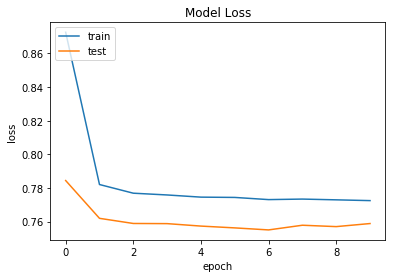

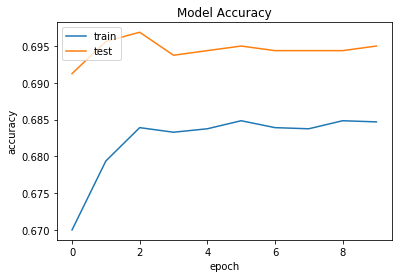

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.figure()
plt.plot(trained_model.history['acc'])
plt.plot(trained_model.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Save the model

In [9]:
import pickle

filename = 'model_metadata.sav'
pickle.dump(model, open(filename, 'wb'))